# **Presentación del proyecto**
---


## **Abstracto con Motivación y Audiencia**


### **Motivación**
La Realidad Virtual (VR) representa una de las herramientas tecnológicas más prometedoras para transformar la enseñanza tradicional en experiencias de aprendizaje inmersivas, interactivas y significativas. Su potencial para aumentar la motivación, la atención y la comprensión de los estudiantes ha despertado un gran interés en instituciones educativas y desarrolladores de tecnología educativa. Sin embargo, aún existe una brecha entre la expectativa pedagógica y la evidencia empírica que permita medir de manera cuantitativa su verdadero impacto.
El presente estudio busca cerrar esa brecha mediante un análisis exploratorio de datos (EDA) sobre el uso de VR en contextos educativos, evaluando en qué condiciones (horas de uso, nivel educativo, materia, pericia docente, acceso a equipamiento) se logran mejores resultados en motivación, creatividad y rendimiento académico.
### **Audiencia**
Este proyecto está dirigido a directivos académicos interesados en la adopción tecnológica, equipos de innovación educativa, emprendedores EdTech, docentes y analistas de datos que deseen comprender cómo la VR influye en la experiencia educativa y cómo puede optimizarse su implementación.

## **Contexto Comercial y Analítico**


En el ámbito educativo actual, las instituciones buscan integrar tecnologías inmersivas como la Realidad Virtual para enriquecer la enseñanza, pero necesitan evidencia cuantitativa que justifique la inversión y permita tomar decisiones informadas.
Este análisis proporciona un enfoque tanto comercial (identificar escenarios de mayor impacto para priorizar inversiones o desarrollos de productos) como analítico (descubrir relaciones entre el uso de VR y los resultados de aprendizaje).
A partir de este estudio, se podrán extraer conclusiones útiles para diseñar estrategias de implementación o prototipos educativos basados en datos reales.

## **Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**


### **Preguntas clave:**
1. ¿Existe una relación positiva entre las horas de uso de VR y el nivel de
engagement estudiantil?
2. ¿El impacto de la VR en la creatividad y el aprendizaje depende del tipo de asignatura o grado educativo?
3. ¿La experiencia del docente y el acceso a equipos influyen en la efectividad percibida del aprendizaje con VR?
4. ¿El nivel de estrés o la colaboración entre pares afecta los resultados educativos al usar VR?



## 1. Objetivo


**Objetivo general:**
Analizar el impacto del uso de la Realidad Virtual en el proceso de aprendizaje para determinar su influencia en el compromiso, la creatividad y la efectividad percibida de los estudiantes.

**Objetivos específicos:**
* Explorar la relación entre las horas de uso de VR y el engagement estudiantil.
* Evaluar cómo factores como el grado, la asignatura y el acceso a equipos afectan los resultados.
* Identificar los principales impulsores del aprendizaje basado en VR mediante análisis estadísticos y visualizaciones.
* Proporcionar evidencia cuantitativa que respalde decisiones estratégicas sobre la integración de VR en la educación.

## 2. Librerias necesarias para el analisis de datos

In [528]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2 , f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [529]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 3. Lectura de datos

In [530]:

RAW_URL = "https://raw.githubusercontent.com/ryc343/data_education/refs/heads/main/Virtual_Reality_in_Education_Impact.csv"
df = pd.read_csv(RAW_URL)
df.shape, df.columns.tolist()


((5000, 20),
 ['Student_ID',
  'Age',
  'Gender',
  'Grade_Level',
  'Field_of_Study',
  'Usage_of_VR_in_Education',
  'Hours_of_VR_Usage_Per_Week',
  'Engagement_Level',
  'Improvement_in_Learning_Outcomes',
  'Subject',
  'Instructor_VR_Proficiency',
  'Perceived_Effectiveness_of_VR',
  'Access_to_VR_Equipment',
  'Impact_on_Creativity',
  'Stress_Level_with_VR_Usage',
  'Collaboration_with_Peers_via_VR',
  'Feedback_from_Educators_on_VR',
  'Interest_in_Continuing_VR_Based_Learning',
  'Region',
  'School_Support_for_VR_in_Curriculum'])

In [531]:
df.head()

,Student_ID,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,STUD0001,13,Non-binary,Postgraduate,Science,No,6,1,Yes,Computer Science,Intermediate,3,Yes,5,High,No,Neutral,No,South America,No
1,STUD0002,16,Non-binary,Undergraduate,Medicine,No,6,1,Yes,Math,Beginner,2,Yes,3,Low,Yes,Positive,No,Oceania,No
2,STUD0003,15,Prefer not to say,High School,Science,No,4,5,Yes,Art,Advanced,5,Yes,2,Low,Yes,Neutral,Yes,Oceania,No
3,STUD0004,24,Female,Postgraduate,Engineering,Yes,2,4,No,Economics,Beginner,5,No,3,High,No,Neutral,No,Europe,Yes
4,STUD0005,22,Non-binary,Undergraduate,Arts,Yes,10,3,No,Art,Beginner,4,Yes,1,Medium,No,Negative,Yes,North America,Yes


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Student_ID                                5000 non-null   object
 1   Age                                       5000 non-null   int64 
 2   Gender                                    5000 non-null   object
 3   Grade_Level                               5000 non-null   object
 4   Field_of_Study                            5000 non-null   object
 5   Usage_of_VR_in_Education                  5000 non-null   object
 6   Hours_of_VR_Usage_Per_Week                5000 non-null   int64 
 7   Engagement_Level                          5000 non-null   int64 
 8   Improvement_in_Learning_Outcomes          5000 non-null   object
 9   Subject                                   5000 non-null   object
 10  Instructor_VR_Proficiency                 5000 n

In [533]:
df.describe()

,Age,Hours_of_VR_Usage_Per_Week,Engagement_Level,Perceived_Effectiveness_of_VR,Impact_on_Creativity
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.182200,5.025400,3.021400,2.951600,3.019600
std,5.461957,3.140816,1.427358,1.417625,1.437508
min,12.000000,0.000000,1.000000,1.000000,1.000000
25%,16.000000,2.000000,2.000000,2.000000,2.000000
50%,21.000000,5.000000,3.000000,3.000000,3.000000
75%,26.000000,8.000000,4.000000,4.000000,4.000000
max,30.000000,10.000000,5.000000,5.000000,5.000000


In [534]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])
print("\nTipos de datos:\n",df.dtypes)
print("\nValores nulos por columna:\n", df.isna().sum().sort_values(ascending=False))


Filas: 5000
Columnas: 20

Tipos de datos:
 Student_ID                                  object
Age                                          int64
Gender                                      object
Grade_Level                                 object
Field_of_Study                              object
Usage_of_VR_in_Education                    object
Hours_of_VR_Usage_Per_Week                   int64
Engagement_Level                             int64
Improvement_in_Learning_Outcomes            object
Subject                                     object
Instructor_VR_Proficiency                   object
Perceived_Effectiveness_of_VR                int64
Access_to_VR_Equipment                      object
Impact_on_Creativity                         int64
Stress_Level_with_VR_Usage                  object
Collaboration_with_Peers_via_VR             object
Feedback_from_Educators_on_VR               object
Interest_in_Continuing_VR_Based_Learning    object
Region                                 

In [535]:
# Resumen de columnas numéricas
display(df.select_dtypes(include=[np.number]).describe())

,Age,Hours_of_VR_Usage_Per_Week,Engagement_Level,Perceived_Effectiveness_of_VR,Impact_on_Creativity
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.182200,5.025400,3.021400,2.951600,3.019600
std,5.461957,3.140816,1.427358,1.417625,1.437508
min,12.000000,0.000000,1.000000,1.000000,1.000000
25%,16.000000,2.000000,2.000000,2.000000,2.000000
50%,21.000000,5.000000,3.000000,3.000000,3.000000
75%,26.000000,8.000000,4.000000,4.000000,4.000000
max,30.000000,10.000000,5.000000,5.000000,5.000000


In [536]:
#Eliminar columnas irrelevantes
df = df.drop(columns=["Student_ID"])

### **Descripción de variables**

In [537]:
descripciones = [

    "Edad del estudiante (en años).",                             # Age
    "Género del estudiante.",                                     # Gender
    "Nivel o grado educativo.",                                   # Grade_Level
    "Campo o área de estudio.",                                   # Field_of_Study
    "Uso de la realidad virtual en educación (categoría).",       # Usage_of_VR_in_Education
    "Horas de uso de VR por semana.",                             # Hours_of_VR_Usage_Per_Week
    "Nivel de compromiso o engagement del estudiante (escala).",  # Engagement_Level
    "Mejora percibida en los resultados de aprendizaje.",          # Improvement_in_Learning_Outcomes
    "Asignatura o curso relacionado con el uso de VR.",           # Subject
    "Pericia o dominio del docente en VR (escala).",              # Instructor_VR_Proficiency
    "Efectividad percibida del aprendizaje con VR (escala).",     # Perceived_Effectiveness_of_VR
    "Acceso del estudiante a equipamiento de VR.",                # Access_to_VR_Equipment
    "Impacto percibido de la VR en la creatividad (escala).",     # Impact_on_Creativity
    "Nivel de estrés asociado al uso de VR.",                     # Stress_Level_with_VR_Usage
    "Colaboración con pares mediante el uso de VR.",              # Collaboration_with_Peers_via_VR
    "Retroalimentación de los educadores sobre el uso de VR.",    # Feedback_from_Educators_on_VR
    "Interés del estudiante en continuar aprendiendo con VR.",    # Interest_in_Continuing_VR_Based_Learning
    "Región geográfica del estudiante o institución.",            # Region
    "Apoyo institucional para incluir VR en el currículo."        # School_Support_for_VR_in_Curriculum
]

desc = pd.DataFrame({
    "Variable": df.columns[:len(descripciones)],
    "Tipo": df.dtypes.astype(str).values[:len(descripciones)],
    "Descripción": descripciones
})

display(desc)



,Variable,Tipo,Descripción
0,Age,int64,Edad del estudiante (en años).
1,Gender,object,Género del estudiante.
2,Grade_Level,object,Nivel o grado educativo.
3,Field_of_Study,object,Campo o área de estudio.
4,Usage_of_VR_in_Education,object,Uso de la realidad virtual en educación (categ...
5,Hours_of_VR_Usage_Per_Week,int64,Horas de uso de VR por semana.
6,Engagement_Level,int64,Nivel de compromiso o engagement del estudiant...
7,Improvement_in_Learning_Outcomes,object,Mejora percibida en los resultados de aprendiz...
8,Subject,object,Asignatura o curso relacionado con el uso de VR.
9,Instructor_VR_Proficiency,object,Pericia o dominio del docente en VR (escala).


### **Data Wrangling - Limpieza y transformación de datos**


**Valores duplicados**

In [538]:
dups = df.duplicated().sum()
print("Filas duplicadas:", dups)
if dups > 0:
    df = df.drop_duplicates()


Filas duplicadas: 0


**Valores nulos**

In [539]:
nulos = df.isna().sum().sort_values(ascending=False)
nulos

,0
Age,0
Gender,0
Grade_Level,0
Field_of_Study,0
Usage_of_VR_in_Education,0
Hours_of_VR_Usage_Per_Week,0
Engagement_Level,0
Improvement_in_Learning_Outcomes,0
Subject,0
Instructor_VR_Proficiency,0


**Tratamiento de valores outliers**

In [540]:
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns
outliers = []
for col in num_cols:
    s = df[col].dropna()
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    n_out = ((s < lo) | (s > hi)).sum()
    outliers.append((col, int(n_out), float(n_out/len(s))*100))
pd.DataFrame(outliers, columns=["columna", "n_outliers", "pct_outliers"]).sort_values("pct_outliers", ascending=False)


,columna,n_outliers,pct_outliers
0,Age,0,0.0
1,Hours_of_VR_Usage_Per_Week,0,0.0
2,Engagement_Level,0,0.0
3,Perceived_Effectiveness_of_VR,0,0.0
4,Impact_on_Creativity,0,0.0


In [541]:
# Ejemplo de codificación one-hot para modelado (opcional)
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df_model = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_model.shape


(5000, 39)

## 4. Hipótesis

* **Hipótesis nula (H0):** El uso de realidad virtual no mejora significativamente el rendimiento académico.
* **Hipótesis alternativa (H1):** El uso de realidad virtual mejora significativamente el rendimiento académico.

## Análisis Exploratorio de datos (EDA)

### 5.1. Revisar valores faltantes

In [542]:
missing_values = df.isnull().sum()

In [543]:
missing_values

,0
Age,0
Gender,0
Grade_Level,0
Field_of_Study,0
Usage_of_VR_in_Education,0
Hours_of_VR_Usage_Per_Week,0
Engagement_Level,0
Improvement_in_Learning_Outcomes,0
Subject,0
Instructor_VR_Proficiency,0


### 5.2. Distribución de la variable objetivo ('target')


Variable dependiente:
Improvement_in_Learning_Outcomes

In [544]:
col ="Improvement_in_Learning_Outcomes"

In [545]:
print(df[col].describe())

count     5000
unique       2
top        Yes
freq      2512
Name: Improvement_in_Learning_Outcomes, dtype: object


In [546]:
print(df[col].unique())

['Yes' 'No']


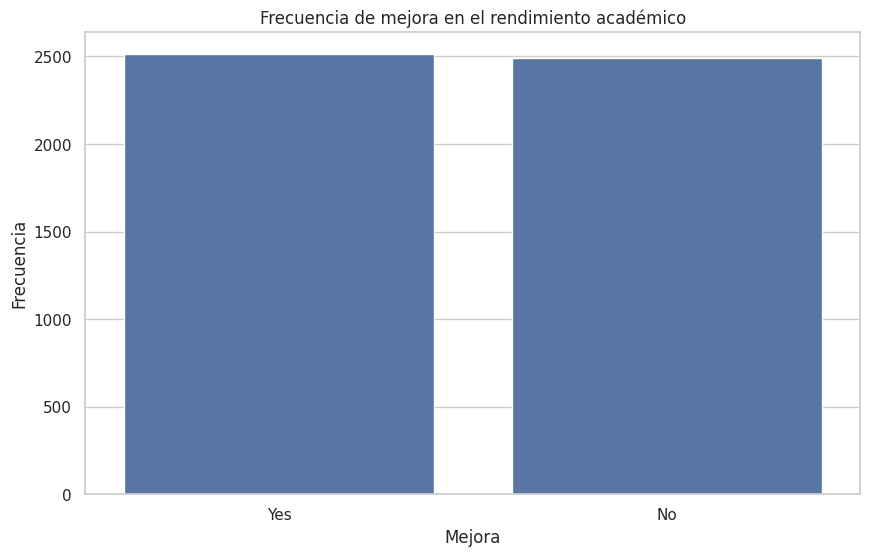

In [547]:
sns.countplot(x=df["Improvement_in_Learning_Outcomes"])
plt.title("Frecuencia de mejora en el rendimiento académico")
plt.xlabel("Mejora")
plt.ylabel("Frecuencia")
plt.show()

Variable a analizar:
* Hours_of_VR_Usage_Per_Week


In [548]:
col = "Hours_of_VR_Usage_Per_Week"
print(df[col].unique())

[ 6  4  2 10  9  1  0  5  3  8  7]


Histograma + KDE

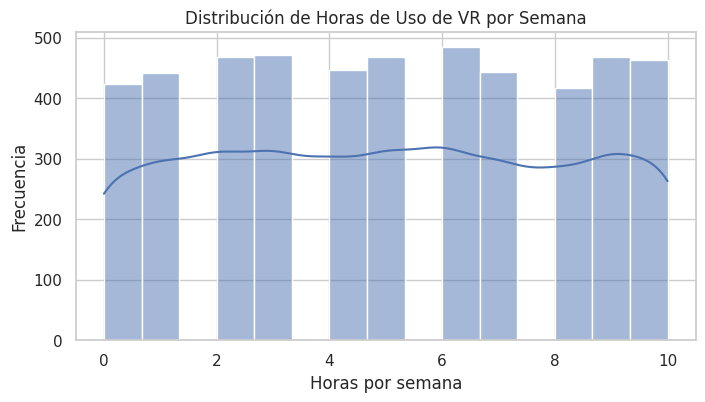

In [549]:
plt.figure(figsize=(8,4))
sns.histplot(df[col], kde=True)
plt.title("Distribución de Horas de Uso de VR por Semana")
plt.xlabel("Horas por semana")
plt.ylabel("Frecuencia")
plt.show()

Variable a analizar:
Usage_of_VR_in_Education

In [550]:
col="Usage_of_VR_in_Education"

In [551]:
print(df[col].describe())
print(df[col].unique())

count     5000
unique       2
top        Yes
freq      2528
Name: Usage_of_VR_in_Education, dtype: object
['No' 'Yes']


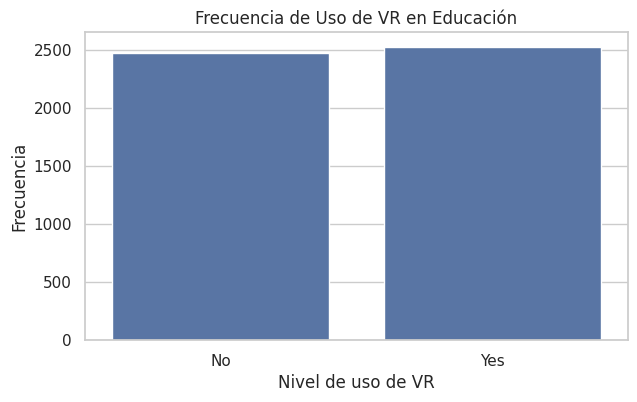

In [552]:
plt.figure(figsize=(7,4))
sns.countplot(x=df[col])
plt.title("Frecuencia de Uso de VR en Educación")
plt.xlabel("Nivel de uso de VR")
plt.ylabel("Frecuencia")
plt.show()

In [553]:
print("PORCENTAJES POR CATEGORÍA:")
print(df[col].value_counts(normalize=True) * 100)
print("\n------------------------\n")

PORCENTAJES POR CATEGORÍA:
Usage_of_VR_in_Education
Yes    50.56
No     49.44
Name: proportion, dtype: float64

------------------------



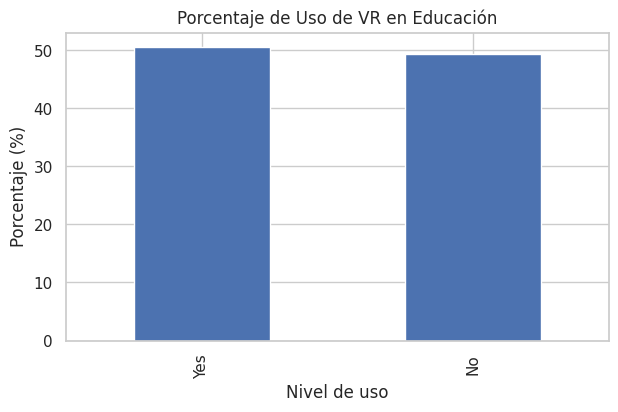

In [554]:
plt.figure(figsize=(7,4))
df[col].value_counts(normalize=True).mul(100).plot(kind='bar')
plt.title("Porcentaje de Uso de VR en Educación")
plt.xlabel("Nivel de uso")
plt.ylabel("Porcentaje (%)")
plt.show()

### 5.3. Análisis de variables numéricas

In [555]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['Age',
 'Hours_of_VR_Usage_Per_Week',
 'Engagement_Level',
 'Perceived_Effectiveness_of_VR',
 'Impact_on_Creativity']

In [556]:
numerical_continuous = [col for col in numerical_features]

In [557]:
numerical_continuous

['Age',
 'Hours_of_VR_Usage_Per_Week',
 'Engagement_Level',
 'Perceived_Effectiveness_of_VR',
 'Impact_on_Creativity']

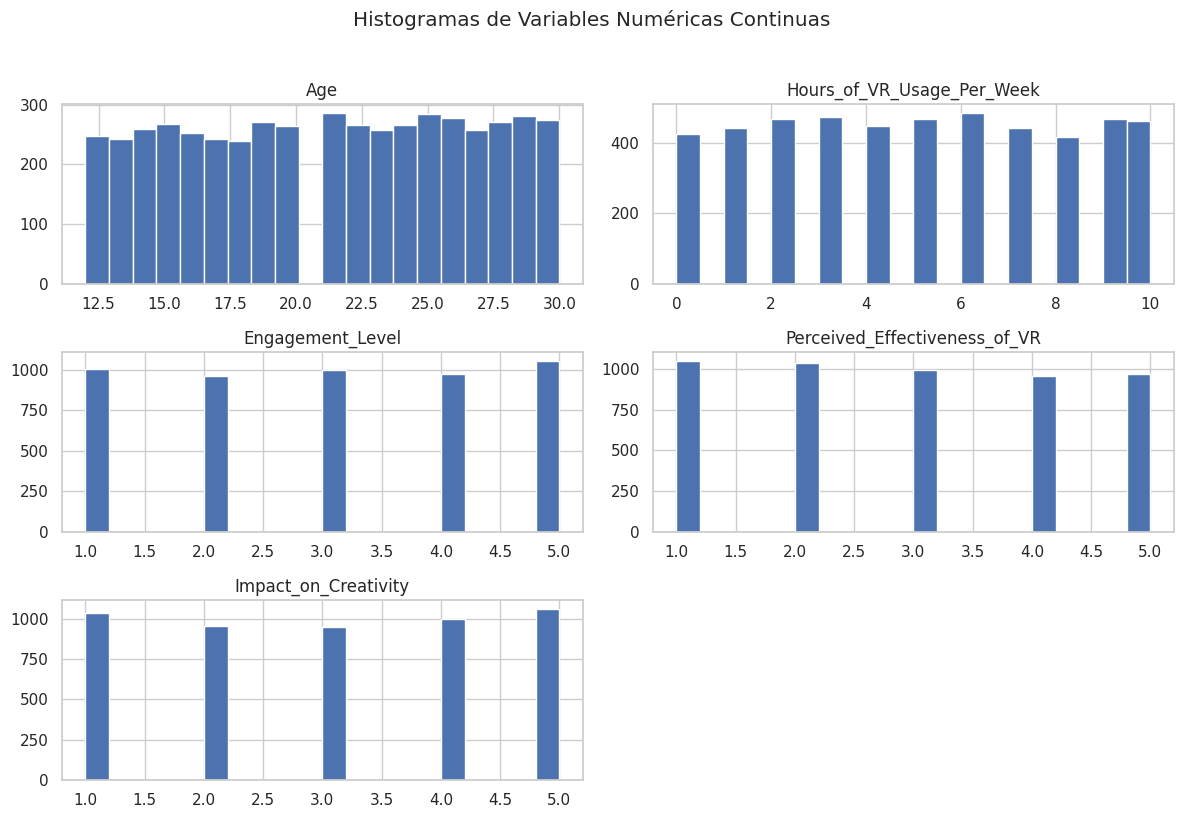

In [558]:
# Histogramas para variables continuas
df[numerical_continuous].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de Variables Numéricas Continuas', y=1.02)
plt.tight_layout()
plt.show()

In [559]:
# Boxplots para variables continuas vs target


### 5.4. Análisis de variables categóricas (incluyendo las codificadas numéricamente)

In [560]:
# 1. Detectar variables categóricas
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Variables categóricas detectadas:")
print(categorical_features)

Variables categóricas detectadas:
['Gender', 'Grade_Level', 'Field_of_Study', 'Usage_of_VR_in_Education', 'Improvement_in_Learning_Outcomes', 'Subject', 'Instructor_VR_Proficiency', 'Access_to_VR_Equipment', 'Stress_Level_with_VR_Usage', 'Collaboration_with_Peers_via_VR', 'Feedback_from_Educators_on_VR', 'Interest_in_Continuing_VR_Based_Learning', 'Region', 'School_Support_for_VR_in_Curriculum']


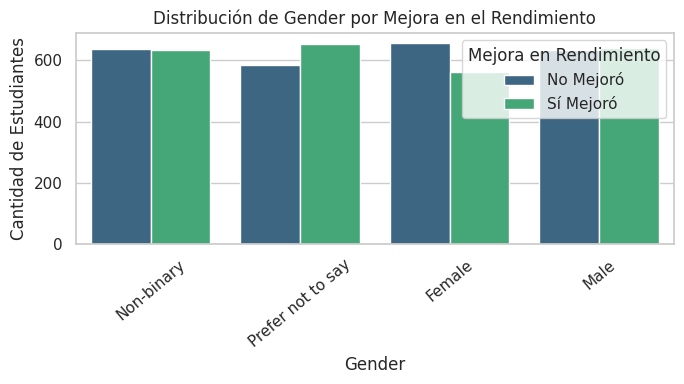

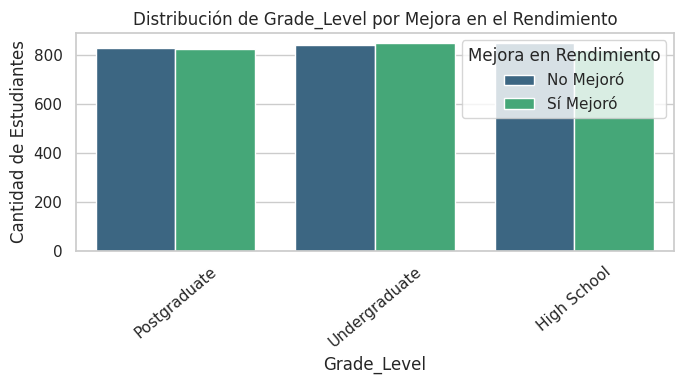

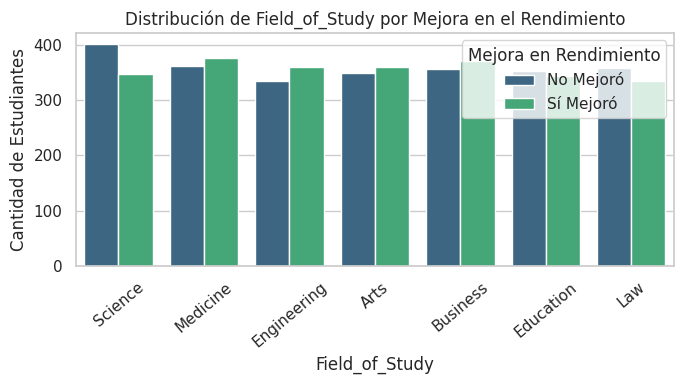

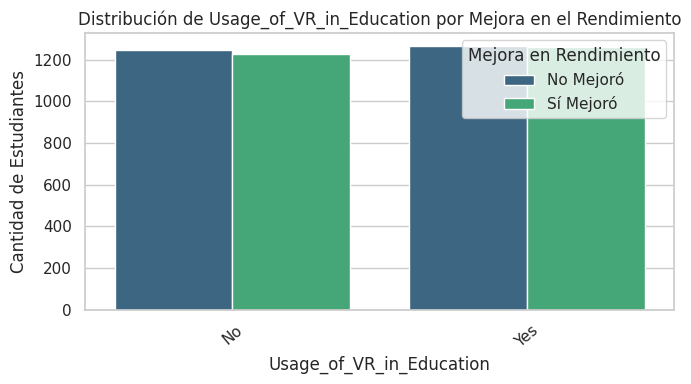

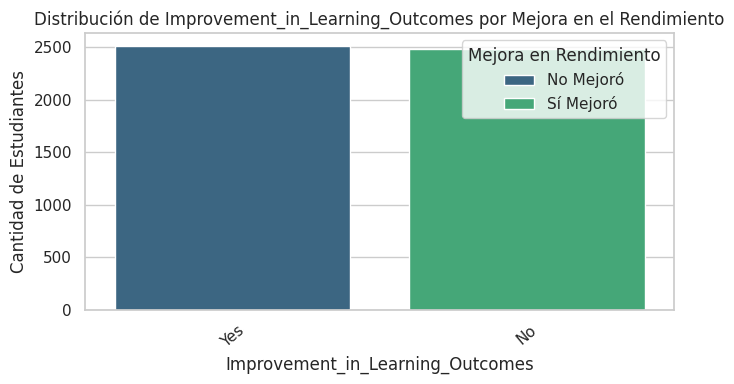

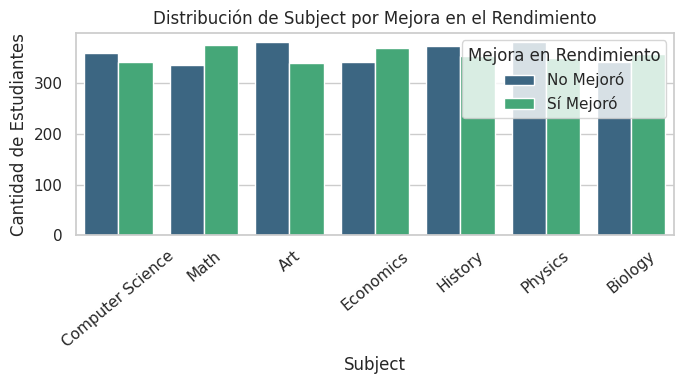

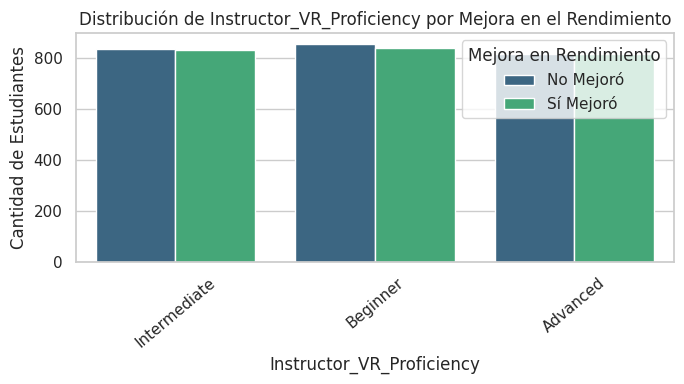

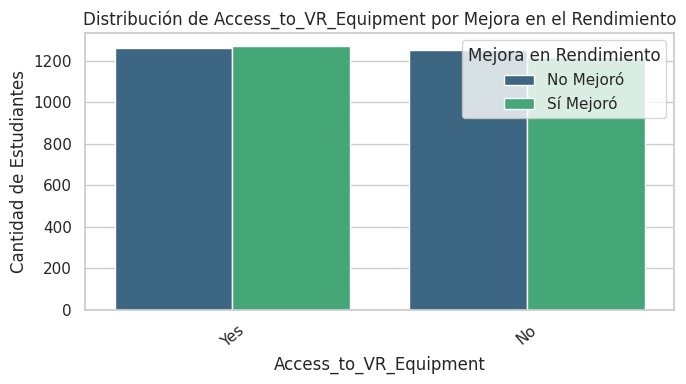

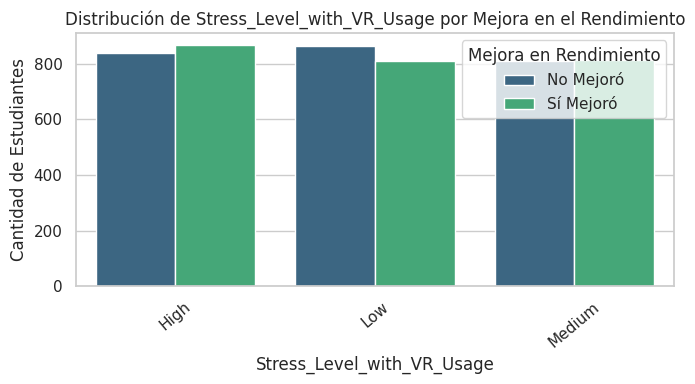

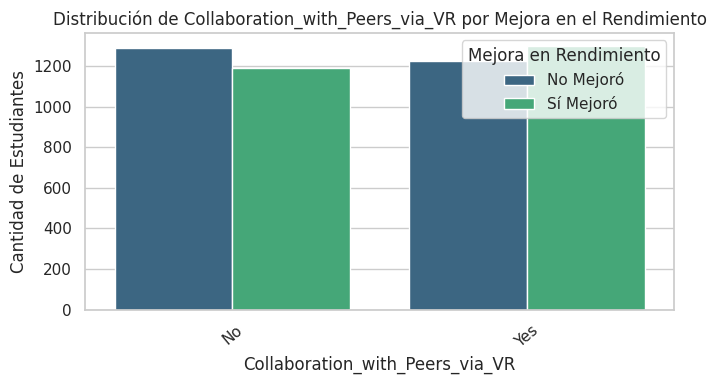

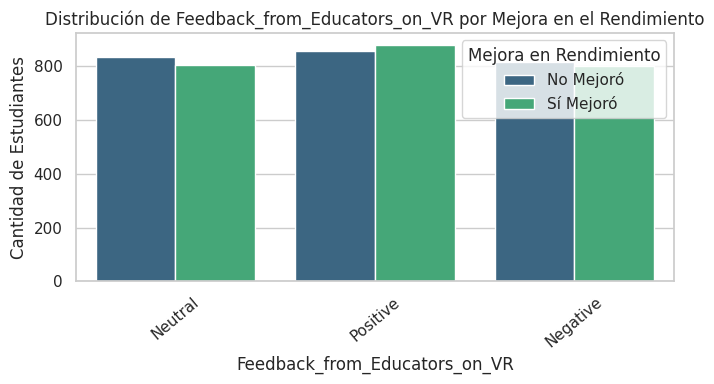

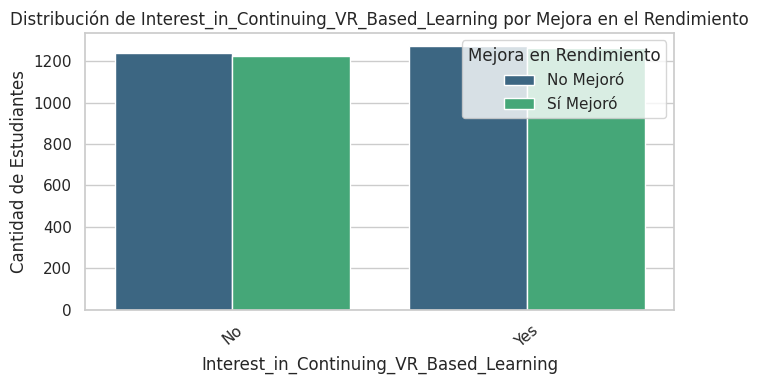

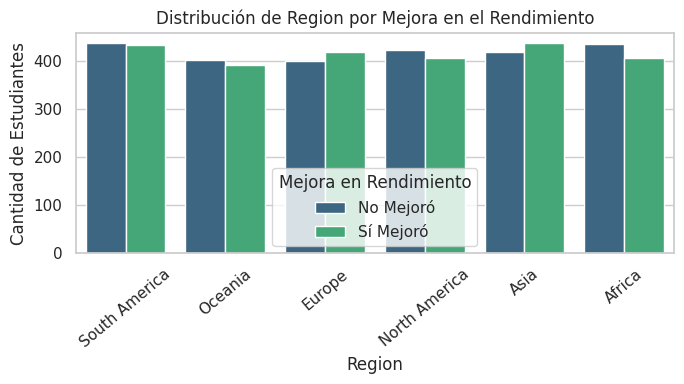

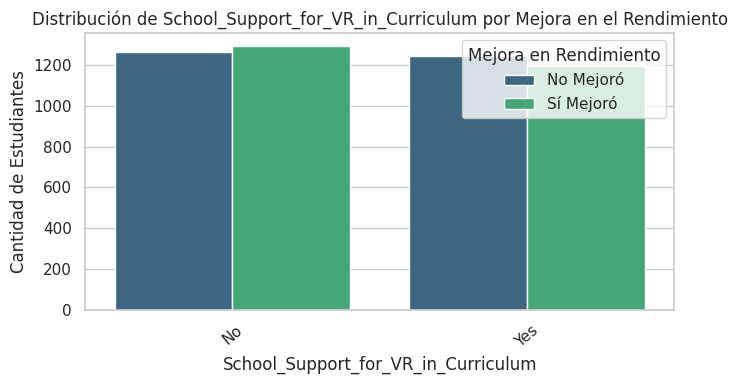

In [561]:
# 2. Graficar countplots estilo Coderhouse
for col in categorical_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(
        x=col,
        data=df,
        hue="Improvement_in_Learning_Outcomes",  # target
        palette="viridis"
    )

    plt.title(f"Distribución de {col} por Mejora en el Rendimiento")
    plt.xlabel(col)
    plt.ylabel("Cantidad de Estudiantes")
    plt.xticks(rotation=40)
    plt.legend(
        title="Mejora en Rendimiento",
        labels=["No Mejoró", "Sí Mejoró"]
    )
    plt.tight_layout()
    plt.show()

### 5.5. Matriz de Correlación (solo para numéricas continuas y target)

In [562]:
# Convertir target
df['Improvement_in_Learning_Outcomes'] = df['Improvement_in_Learning_Outcomes'].map({
    'Yes': 1,
    'No': 0
})
target = 'Improvement_in_Learning_Outcomes'

In [563]:

# Incluimos 'target' para ver correlaciones con la variable objetivo
corr_features = numerical_continuous + [target]
correlation_matrix = df[corr_features].corr()


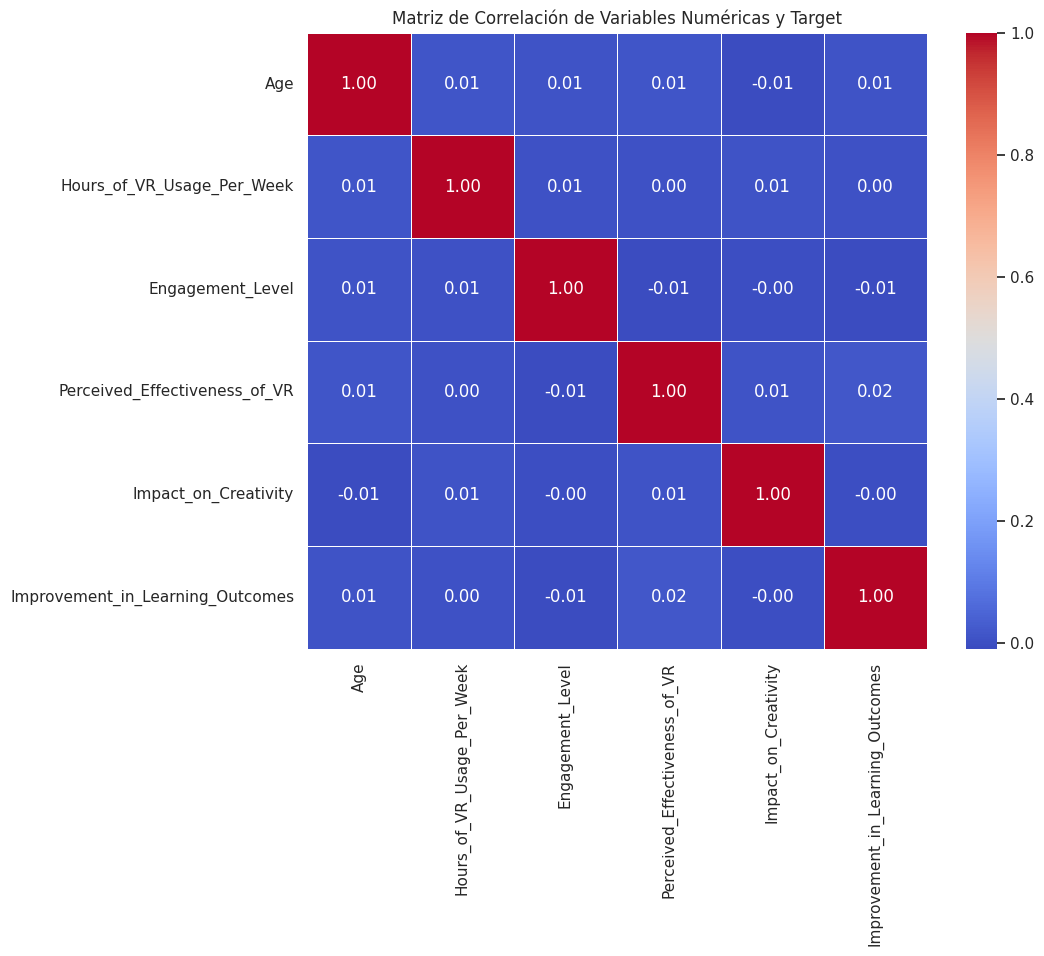

In [564]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

In [565]:
print("Correlaciones con la variable 'target':")
correlation_matrix[target].sort_values(ascending=False)

Correlaciones con la variable 'target':


,Improvement_in_Learning_Outcomes
Improvement_in_Learning_Outcomes,1.000000
Perceived_Effectiveness_of_VR,0.015967
Age,0.008739
Hours_of_VR_Usage_Per_Week,0.002572
Impact_on_Creativity,-0.003962
Engagement_Level,-0.009461


## 6. Feature Engineering (Ingeniería de Características)

In [566]:
# Actualizamos la lista de características categóricas a codificar
categorical_features_for_encoding = [
    col for col in categorical_features
    if col != target
]
# Lista de características numéricas (las originales continuas)
numerical_features_for_scaling = numerical_continuous

In [567]:
# Lista completa de características a usar (excluyendo 'target')
# En este caso, usamos todas menos 'target'. 'age' se escala, 'age_group' se codifica.
features = numerical_features_for_scaling + categorical_features_for_encoding
target = 'Improvement_in_Learning_Outcomes'
print(f"\nCaracterísticas numéricas a escalar: {numerical_features_for_scaling}")
print(f"Características categóricas a codificar (OneHot): {categorical_features_for_encoding}")
print(f"Variable objetivo: {target}")
print("\n")


Características numéricas a escalar: ['Age', 'Hours_of_VR_Usage_Per_Week', 'Engagement_Level', 'Perceived_Effectiveness_of_VR', 'Impact_on_Creativity']
Características categóricas a codificar (OneHot): ['Gender', 'Grade_Level', 'Field_of_Study', 'Usage_of_VR_in_Education', 'Subject', 'Instructor_VR_Proficiency', 'Access_to_VR_Equipment', 'Stress_Level_with_VR_Usage', 'Collaboration_with_Peers_via_VR', 'Feedback_from_Educators_on_VR', 'Interest_in_Continuing_VR_Based_Learning', 'Region', 'School_Support_for_VR_in_Curriculum']
Variable objetivo: Improvement_in_Learning_Outcomes




## 7. Preprocesamiento de Datos

In [568]:
# Definir las características (X) y la variable objetivo (y)
X = df[features]
y = df[target]

In [569]:
features

['Age',
 'Hours_of_VR_Usage_Per_Week',
 'Engagement_Level',
 'Perceived_Effectiveness_of_VR',
 'Impact_on_Creativity',
 'Gender',
 'Grade_Level',
 'Field_of_Study',
 'Usage_of_VR_in_Education',
 'Subject',
 'Instructor_VR_Proficiency',
 'Access_to_VR_Equipment',
 'Stress_Level_with_VR_Usage',
 'Collaboration_with_Peers_via_VR',
 'Feedback_from_Educators_on_VR',
 'Interest_in_Continuing_VR_Based_Learning',
 'Region',
 'School_Support_for_VR_in_Curriculum']

In [570]:
# Crear el preprocesador usando ColumnTransformer

# 1. OneHotEncoder para las variables categóricas
#    handle_unknown='ignore' es útil si aparecen valores en test que no estaban en train.
#    drop='first' puede usarse para evitar multicolinealidad, aunque RF es menos sensible. Lo omitimos por simplicidad.
# 2. StandardScaler para las variables numéricas continuas.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
    ],
    remainder='passthrough' # Si hubiera columnas no especificadas, las dejaría pasar (¡cuidado!)
    # O usa remainder='drop' si quieres asegurar que solo se usen las especificadas
)


In [571]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'Hours_of_VR_Usage_Per_Week',
                                  'Engagement_Level',
                                  'Perceived_Effectiveness_of_VR',
                                  'Impact_on_Creativity']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Grade_Level', 'Field_of_Study',
                                  'Usage_of_VR_in_Education', 'Subject',
                                  'Instructor_VR_Proficiency',
                                  'Access_to_VR_Equipment',
                                  'Stress_Level_with_VR_Usage',
                                  'Collaboration_with_Peers_via_VR',
                                  'Feedback_from_Educators_on_VR',
                                  'Interest_in_Continuing_VR_Based_Learning',
                                  'Region',
                                  'School_Support_for_VR_in_Curriculum'])])

## 8. División de Datos (Train/Test Split)

In [572]:
# Dividir los datos ANTES de aplicar el preprocesamiento (específicamente el escalado)
# Usamos stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [573]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (3750, 18)
Tamaño del conjunto de prueba (X_test): (1250, 18)
Tamaño del conjunto de entrenamiento (y_train): (3750,)
Tamaño del conjunto de prueba (y_test): (1250,)


In [574]:
print("\nDistribución de la variable objetivo en Train vs Test:")
print(f"Train: \n{y_train.value_counts(normalize=True)}")
print(f"Test: \n{y_test.value_counts(normalize=True)}")


Distribución de la variable objetivo en Train vs Test:
Train: 
Improvement_in_Learning_Outcomes
1    0.5024
0    0.4976
Name: proportion, dtype: float64
Test: 
Improvement_in_Learning_Outcomes
1    0.5024
0    0.4976
Name: proportion, dtype: float64


## 9. Construcción y Entrenamiento del Modelo (Random Forest)

In [575]:
# Crear el pipeline: incluye el preprocesador y el clasificador
# Esto asegura que el preprocesamiento se ajuste ("fit") SOLO en los datos de entrenamiento
# y luego se aplique ("transform") tanto a los datos de entrenamiento como a los de prueba.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
    # n_estimators: número de árboles en el bosque. 100 es un buen punto de partida.
    # random_state: para reproducibilidad.
    # class_weight='balanced': útil si las clases están desbalanceadas, ajusta pesos inversamente proporcional a la frecuencia.
])

In [576]:
# Entrenar el pipeline completo (preprocesamiento + modelo)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Hours_of_VR_Usage_Per_Week',
                                                   'Engagement_Level',
                                                   'Perceived_Effectiveness_of_VR',
                                                   'Impact_on_Creativity']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Grade_Level',
                                                   'Field_of_Study',
                                                   'Usage_of_VR_in_Education',
                                                   'Subject',
                                                   'Instructor_VR_Proficiency',
                                                   'Access_to_VR_Equipment',
                                                   'Stress_Level_with_VR_Usage',
                                                   'Collaboration_with_Peers_via_VR',
                                                   'Feedback_from_Educators_on_VR',
                                                   'Interest_in_Continuing_VR_Based_Learning',
                                                   'Region',
                                                   'School_Support_for_VR_in_Curriculum'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

## 10. Evaluación del Modelo

In [577]:
# Realizar predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (1)

### 10.1. Accuracy

In [578]:
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy Score ---")
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

--- Accuracy Score ---
Accuracy en el conjunto de prueba: 0.4784


### 10.2 Confusion Matrix


--- Matriz de Confusión ---


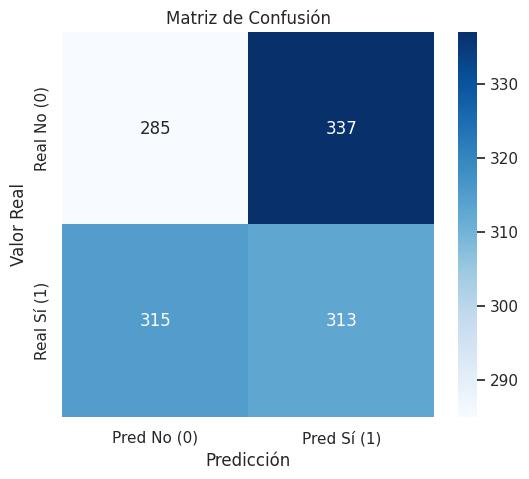

Verdaderos Negativos (TN): 285
Falsos Positivos (FP): 337
Falsos Negativos (FN): 315
Verdaderos Positivos (TP): 313


In [579]:
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No (0)', 'Pred Sí (1)'], yticklabels=['Real No (0)', 'Real Sí (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
print(f"Verdaderos Negativos (TN): {cm[0,0]}")
print(f"Falsos Positivos (FP): {cm[0,1]}")
print(f"Falsos Negativos (FN): {cm[1,0]}")
print(f"Verdaderos Positivos (TP): {cm[1,1]}")

### 10.3. Reporte de Clasificación (Precisión, Recall, F1-Score)


In [580]:
target_names = ['No Mejora (0)', 'Sí Mejora (1)']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

No Mejora (0)       0.47      0.46      0.47       622
Sí Mejora (1)       0.48      0.50      0.49       628

     accuracy                           0.48      1250
    macro avg       0.48      0.48      0.48      1250
 weighted avg       0.48      0.48      0.48      1250



### 10.4. Curva ROC y AUC

In [581]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

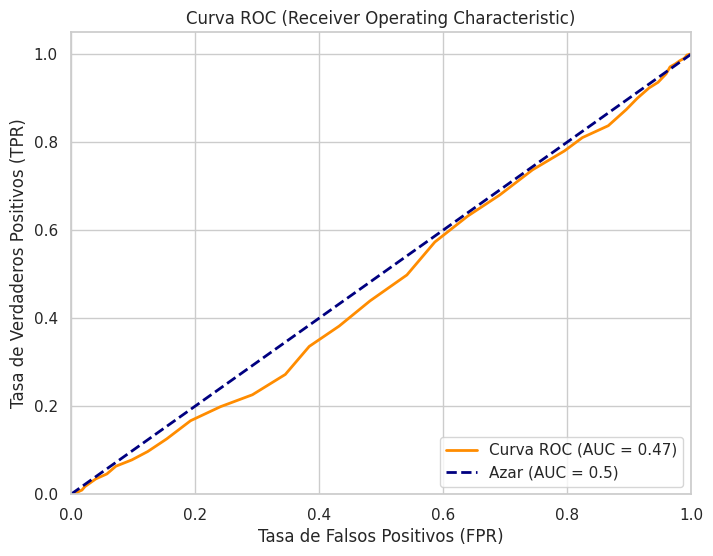

In [582]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

In [583]:
print(f"Área Bajo la Curva ROC (AUC): {roc_auc:.4f}")

Área Bajo la Curva ROC (AUC): 0.4728


## 11. Análisis de Importancia de Características

In [584]:
# Para obtener la importancia, necesitamos acceder al clasificador DENTRO del pipeline
rf_classifier = model_pipeline.named_steps['classifier']
importances = rf_classifier.feature_importances_

In [585]:
# Obtener el transformador OneHotEncoder del preprocesador
ohe_transformer = model_pipeline.named_steps['preprocessor'].transformers_[1][1]
# Obtener las categorías de las características codificadas
ohe_categories = ohe_transformer.categories_

In [586]:
ohe_categories

[array(['Female', 'Male', 'Non-binary', 'Prefer not to say'], dtype=object),
 array(['High School', 'Postgraduate', 'Undergraduate'], dtype=object),
 array(['Arts', 'Business', 'Education', 'Engineering', 'Law', 'Medicine',
        'Science'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Art', 'Biology', 'Computer Science', 'Economics', 'History',
        'Math', 'Physics'], dtype=object),
 array(['Advanced', 'Beginner', 'Intermediate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
        'South America'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [587]:
# Crear los nombres de las características codificadas (ej: cp_0, cp_1, sex_0, sex_1...)
# Nota: Asegúrate de que el orden en 'categorical_features_for_encoding' coincide con el usado en ColumnTransformer
ohe_feature_names = []
for i, col in enumerate(categorical_features_for_encoding):
    for category in ohe_categories[i]:
        ohe_feature_names.append(f"{col}_{category}")

In [588]:
ohe_feature_names

['Gender_Female',
 'Gender_Male',
 'Gender_Non-binary',
 'Gender_Prefer not to say',
 'Grade_Level_High School',
 'Grade_Level_Postgraduate',
 'Grade_Level_Undergraduate',
 'Field_of_Study_Arts',
 'Field_of_Study_Business',
 'Field_of_Study_Education',
 'Field_of_Study_Engineering',
 'Field_of_Study_Law',
 'Field_of_Study_Medicine',
 'Field_of_Study_Science',
 'Usage_of_VR_in_Education_No',
 'Usage_of_VR_in_Education_Yes',
 'Subject_Art',
 'Subject_Biology',
 'Subject_Computer Science',
 'Subject_Economics',
 'Subject_History',
 'Subject_Math',
 'Subject_Physics',
 'Instructor_VR_Proficiency_Advanced',
 'Instructor_VR_Proficiency_Beginner',
 'Instructor_VR_Proficiency_Intermediate',
 'Access_to_VR_Equipment_No',
 'Access_to_VR_Equipment_Yes',
 'Stress_Level_with_VR_Usage_High',
 'Stress_Level_with_VR_Usage_Low',
 'Stress_Level_with_VR_Usage_Medium',
 'Collaboration_with_Peers_via_VR_No',
 'Collaboration_with_Peers_via_VR_Yes',
 'Feedback_from_Educators_on_VR_Negative',
 'Feedback_from_

In [589]:
# Combinar nombres de características numéricas y categóricas codificadas
# El orden debe coincidir con cómo ColumnTransformer junta las columnas
final_feature_names = numerical_features_for_scaling + ohe_feature_names

Importancia de las características según Random Forest:
                                        Feature  Importance
0                                           Age    0.084596
1                    Hours_of_VR_Usage_Per_Week    0.072564
2                              Engagement_Level    0.052041
4                          Impact_on_Creativity    0.050490
3                 Perceived_Effectiveness_of_VR    0.047849
39        Feedback_from_Educators_on_VR_Neutral    0.017915
10                     Grade_Level_Postgraduate    0.017774
29           Instructor_VR_Proficiency_Beginner    0.017742
11                    Grade_Level_Undergraduate    0.017469
40       Feedback_from_Educators_on_VR_Positive    0.017453
9                       Grade_Level_High School    0.017292
33              Stress_Level_with_VR_Usage_High    0.017173
30       Instructor_VR_Proficiency_Intermediate    0.017012
19                  Usage_of_VR_in_Education_No    0.016679
41  Interest_in_Continuing_VR_Based_Learning

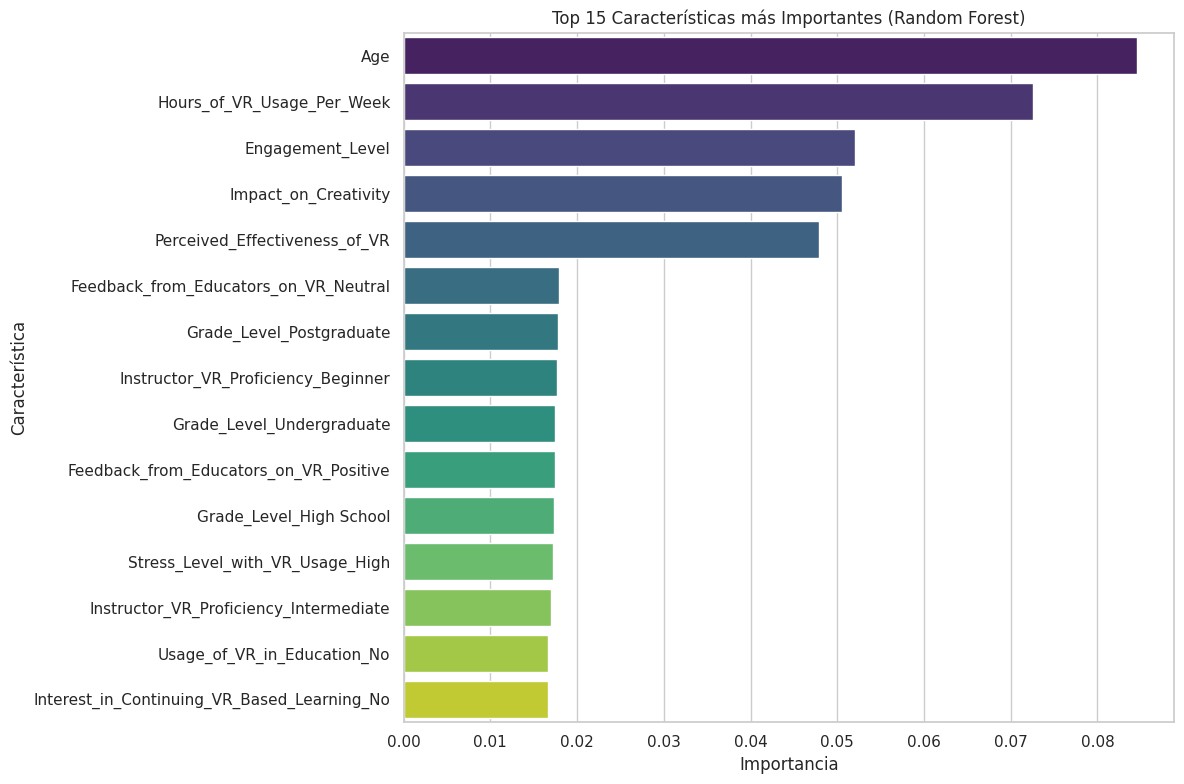

In [590]:
# Crear un DataFrame para visualizar la importancia
if len(importances) == len(final_feature_names):
    feature_importance_df = pd.DataFrame({'Feature': final_feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("Importancia de las características según Random Forest:")
    print(feature_importance_df.head(15)) # Mostrar las 15 más importantes

    # Graficar la importancia de las características
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis', hue='Feature')
    plt.title('Top 15 Características más Importantes (Random Forest)')
    plt.xlabel('Importancia')
    plt.ylabel('Característica')
    plt.tight_layout()
    plt.show()

## 12. Conclusiones

In [591]:
print("Resumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"- AUC del modelo en el conjunto de prueba: {roc_auc:.4f}")
print("- El reporte de clasificación muestra que el modelo no es útil.")

Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 0.4784
- AUC del modelo en el conjunto de prueba: 0.4728
- El reporte de clasificación muestra que el modelo no es útil.


Hipótesis nula (H0): El uso de realidad virtual no mejora significativamente el rendimiento académico.
Hipótesis alternativa (H1): El uso de realidad virtual mejora significativamente el rendimiento académico.

**Validación de la Hipótesis:**

La hipótesis alternativa (H1) planteaba que el uso de VR mejora significatievamente el rendimiento académico.

In [592]:
print(f"Obtuvimos una Accuracy de {accuracy:.2f} y un AUC de {roc_auc:.2f}.")

if accuracy > 0.75 and roc_auc > 0.5:
    print("RESULTADO: La hipótesis alternativa (H1) no es soportada por los resultados. La precisión del modelo no es mejor que el azar.")
    print("No es posible rechazar la hipótesis nula (H0).")
else:
    print("RESULTADO: La hipótesis alternativa (H1) no puede ser validada. El AUC indica que el modelo es inútil, no tiene capacidad para distinguir.")
    print("Se necesita revisar el modelo o los datos.")

Obtuvimos una Accuracy de 0.48 y un AUC de 0.47.
RESULTADO: La hipótesis alternativa (H1) no puede ser validada. El AUC indica que el modelo es inútil, no tiene capacidad para distinguir.
Se necesita revisar el modelo o los datos.


## 13. Probando otros modelos

In [593]:
df_encoded = df.copy()
label_cols = df_encoded.select_dtypes(include="object").columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [594]:
X = df_encoded.drop(columns=["Improvement_in_Learning_Outcomes"])
y = df_encoded["Improvement_in_Learning_Outcomes"]

### Feature selection (SelectKBest)

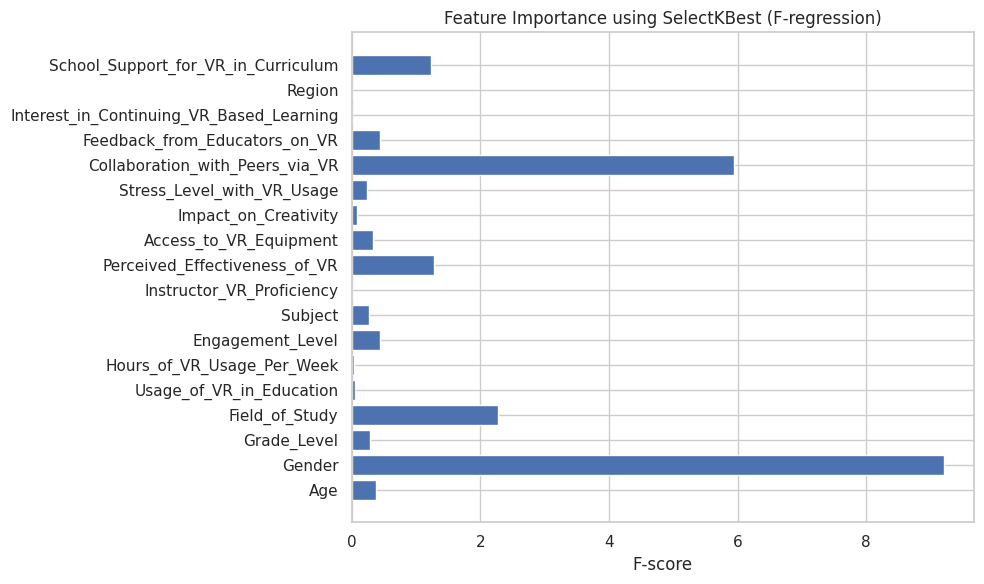

In [595]:
# SelectKBest
selector = SelectKBest(score_func=f_regression, k="all")
selector.fit(X, y)
scores = selector.scores_

# Plot
plt.figure(figsize=(10,6))
plt.barh(X.columns, scores)
plt.xlabel("F-score")
plt.title("Feature Importance using SelectKBest (F-regression)")
plt.tight_layout()
plt.show()

In [596]:
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['Gender', 'Field_of_Study', 'Perceived_Effectiveness_of_VR',
       'Collaboration_with_Peers_via_VR',
       'School_Support_for_VR_in_Curriculum'],
      dtype='object')


### Train-test split

In [597]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

### Modelo: Regresión Logística

In [598]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Métricas

In [599]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.526

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.54      0.44      0.48       508
           1       0.52      0.62      0.56       492

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.52      1000
weighted avg       0.53      0.53      0.52      1000



### Matriz de confusión

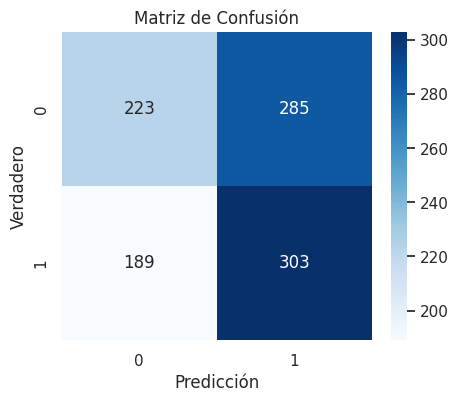

In [600]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

### Conclusión

El modelo de regresión logística logró un accuracy de 52.6%, lo que indica que su capacidad predictiva es baja. A partir de la matriz de confusión observamos que acierta más cuando predice que sí hay mejora, pero falla con frecuencia al identificar los casos sin mejora. Esto muestra que el modelo no está capturando bien la relación entre las variables, por lo que sería recomendable probar algoritmos más potentes (como Random Forest) o mejorar la selección y el preprocesamiento de las características para obtener mejores resultados.

### Recomendación

Para mejorar el rendimiento del modelo, se recomienda probar algoritmos más flexibles como Random Forest, Gradient Boosting o SVM, que suelen desenvolverse mejor con datos categóricos y relaciones no lineales. También sería útil revisar la selección de características, aplicar encoding más robusto (One-Hot Encoding) y experimentar con balanceo de clases si fuera necesario. Con estos ajustes, es probable obtener un modelo más estable y con mayor capacidad predictiva.

### **Random Forest Classifier**

In [601]:
from sklearn.ensemble import RandomForestClassifier

In [602]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [603]:
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

In [604]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [605]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)


In [606]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [607]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.479

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.44      0.46       508
           1       0.47      0.52      0.49       492

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



### Conclusión

Un Accuracy de 0.479 muestra que el modelo no está aprendiendo patrones útiles para predecir si un estudiante mejora o no su rendimiento usando VR.
Su rendimiento es prácticamente equivalente a adivinar al azar.

## 14. Conclusión final

Los modelos aplicados, incluyendo Regresión Logística, Random Forest y Gradient Boosting, obtuvieron resultados entre 47% y 53% de accuracy. Esto sugiere que las variables del dataset no contienen suficiente información predictiva para anticipar la mejora en los resultados de aprendizaje. A pesar de aplicar técnicas de feature selection, encoding, balanceo y modelos más complejos, la performance no mejora de forma significativa. Esto indica que el dataset es altamente ruidoso o que la relación entre las variables independientes y la variable objetivo no está presente o no es lineal. Por ello, no se pueden obtener predicciones precisas con los datos disponibles.